In [ ]:
# Gerardo Herrera... ann: (1 capa oculta con 30 neoronas, activation = 'relu', epochs=10) con 28k instacias de normal y recovering y 24 sensores

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# https://medium.com/@randerson112358/build-your-own-artificial-neural-network-using-python-f37d16be06bf

In [ ]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import time

In [ ]:
#sensor77 = pd.read_csv('../input/vombas/sensor_procesado.csv')
#sensor77 = pd.read_csv('../input/10ks25/s25balanced10k.csv')
#sensor77 = pd.read_csv('../input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv')

sensor77 = pd.read_csv('/content/drive/My Drive/datasets/sensor2-ordenado_status_sin_broken_balanced_28k.csv')


In [ ]:
#Show the shape (number of rows & columns)
sensor77.shape

(28002, 27)

In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
sensor77.isnull().sum()

Unnamed: 0            0
timestamp             0
sensor_00             0
sensor_01            30
sensor_02             0
sensor_03             0
sensor_04             0
sensor_11             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_30             0
sensor_31             0
sensor_44             3
sensor_50         14004
sensor_51          2996
machine_status        0
dtype: int64

In [ ]:
cleanup_nums = {"machine_status":     {"NORMAL": 0, "RECOVERING": 1,"BROKEN": 2}}

In [ ]:
sensor77.replace(cleanup_nums, inplace=True)

In [ ]:
sensor77.fillna(sensor77.mean(), inplace=True)

In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
sensor77.isnull().sum()

Unnamed: 0        0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_11         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_30         0
sensor_31         0
sensor_44         0
sensor_50         0
sensor_51         0
machine_status    0
dtype: int64

In [ ]:
#sensor77.drop('sensor_15', axis=1, inplace=True)
sensor77.drop('timestamp', axis=1, inplace=True)

In [ ]:
#sensor77.drop('100000', axis=1, inplace=True)

In [ ]:
sensor77.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
sensor77.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_11         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_30         0
sensor_31         0
sensor_44         0
sensor_50         0
sensor_51         0
machine_status    0
dtype: int64

In [ ]:
#Convert the data into an array
dataset = sensor77.values
dataset

array([[2.46539400e+00, 4.70920100e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.77951400e+02, 0.00000000e+00],
       [2.46539400e+00, 4.70920100e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.78530100e+02, 0.00000000e+00],
       [2.44473400e+00, 4.73524300e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.77662000e+05, 0.00000000e+00],
       ...,
       [2.40538200e+00, 4.95659714e+01, 5.38194400e+01, ...,
        3.21180573e+01, 3.15393524e+01, 1.00000000e+00],
       [2.40046300e+00, 4.95659700e+01, 5.37760400e+01, ...,
        3.21180573e+01, 3.15393500e+01, 1.00000000e+00],
       [2.40144700e+00, 4.95225700e+01, 5.37760391e+01, ...,
        3.21180573e+01, 3.18287000e+01, 1.00000000e+00]])

In [ ]:
sensor77.shape

(28002, 25)

In [ ]:
# Get all of the rows from the first eight columns of the dataset
#X = dataset[:,0:51] 
X = dataset[:,0:24]
# Get all of the rows from the last column
#y = dataset[:,51] 
y = dataset[:,24] 

In [ ]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
print(X)

[[2.46539400e+00 4.70920100e+01 5.32118000e+01 ... 4.36921300e+01
  4.81174107e+02 1.77951400e+02]
 [2.46539400e+00 4.70920100e+01 5.32118000e+01 ... 4.45601800e+01
  4.81174107e+02 1.78530100e+02]
 [2.44473400e+00 4.73524300e+01 5.32118000e+01 ... 4.60069400e+01
  4.81174107e+02 1.77662000e+05]
 ...
 [2.40538200e+00 4.95659714e+01 5.38194400e+01 ... 3.15393524e+01
  3.21180573e+01 3.15393524e+01]
 [2.40046300e+00 4.95659700e+01 5.37760400e+01 ... 3.15393524e+01
  3.21180573e+01 3.15393500e+01]
 [2.40144700e+00 4.95225700e+01 5.37760391e+01 ... 3.15393524e+01
  3.21180573e+01 3.18287000e+01]]


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.16018541e-03, 1.51254935e-04, 2.97595181e-04, ...,
        7.32072243e-05, 1.01425222e-03, 3.84471811e-04],
       [1.16018541e-03, 1.51254935e-04, 2.97595181e-04, ...,
        7.67494867e-05, 1.01425222e-03, 3.85953388e-04],
       [1.15046306e-03, 1.56160565e-04, 2.97595181e-04, ...,
        8.26532983e-05, 1.01425222e-03, 4.54775949e-01],
       ...,
       [1.13194447e-03, 1.97857886e-04, 3.09041171e-04, ...,
        2.36152335e-05, 1.03499268e-05, 9.63031373e-06],
       [1.12962965e-03, 1.97857860e-04, 3.08223654e-04, ...,
        2.36152335e-05, 1.03499268e-05, 9.63030754e-06],
       [1.13009271e-03, 1.97040318e-04, 3.08223638e-04, ...,
        2.36152335e-05, 1.03499268e-05, 1.03710962e-05]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [ ]:
model = Sequential([
    Dense(24, activation='relu', input_shape=( 24 ,)),
    #Dense(12, activation='relu', input_shape=( 24 ,)),
    #Dense(12, activation='relu', input_shape=( 51 ,)),
    #Dense(15, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
start = time.time()
hist = model.fit(X_train, y_train,
          batch_size=10, epochs=10, validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")
# prints: Training time: 0.20307230949401855s

# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/


Epoch 1/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.4797 - accuracy: 0.8032 - val_loss: 0.3762 - val_accuracy: 0.8404
Epoch 2/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8599 - val_loss: 0.3571 - val_accuracy: 0.8570
Epoch 3/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3411 - accuracy: 0.8642 - val_loss: 0.3526 - val_accuracy: 0.8570
Epoch 4/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3356 - accuracy: 0.8635 - val_loss: 0.3468 - val_accuracy: 0.8541
Epoch 5/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3314 - accuracy: 0.8632 - val_loss: 0.3439 - val_accuracy: 0.8554
Epoch 6/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3278 - accuracy: 0.8631 - val_loss: 0.3398 - val_accuracy: 0.8536
Epoch 7/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3232 - accuracy: 0.8633 - val_loss: 0.3370 - val_accuracy:

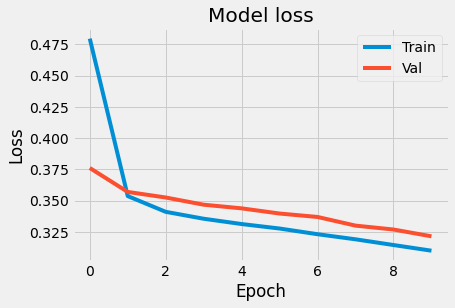

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

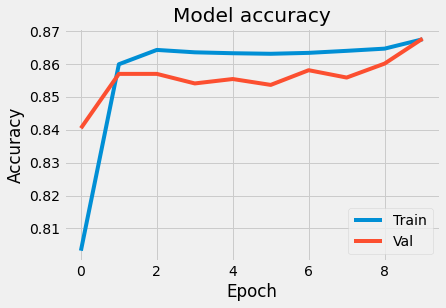

In [ ]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
#prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
prediction  = [1 if y>=0.75 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
#pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     11211
         1.0       0.94      0.80      0.86     11190

    accuracy                           0.87     22401
   macro avg       0.88      0.87      0.87     22401
weighted avg       0.88      0.87      0.87     22401

Confusion Matrix: 
 [[10670   541]
 [ 2268  8922]]

Accuracy:  0.8746038123298067



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
#pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      2790
         1.0       0.94      0.80      0.86      2811

    accuracy                           0.87      5601
   macro avg       0.88      0.87      0.87      5601
weighted avg       0.88      0.87      0.87      5601

Confusion Matrix: 
 [[2638  152]
 [ 569 2242]]

Accuracy:  0.8712729869666131



In [ ]:
model.evaluate(X_test, y_test)[1]

176/176 [==============================] - 0s 880us/step - loss: 0.3135 - accuracy: 0.8713


0.8712729811668396

In [ ]:
# ann cros vaidacion
# https://medium.com/datadriveninvestor/k-fold-and-dropout-in-artificial-neural-network-ea054a89fb4e

In [ ]:
#builing the neural net
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#accuracies =  cross_val_score(estimator=classifier, X= X, y=output_category,cv=10, n_jobs=-1)
#accuracies

#accuracies =  cross_val_score(estimator=model, X= X_test, y=pred,cv=5, n_jobs=-1)
#accuracies

In [ ]:
# https://medium.com/analytics-vidhya/artificial-neural-network-ann-with-keras-simplified-use-case-if-student-pass-the-exam-code-949ddb2a9c91

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
def kera_classifier():
    cf = Sequential()
    #cf.add(Dense(units = 12,  activation = 'relu', input_dim = 24))
    cf.add(Dense(units = 24,  activation = 'relu', input_dim = 24))
    #cf.add(Dense(units = 12,  activation = 'relu', input_dim = 51))
    #cf.add(Dense(units = 15,  activation = 'relu'))
    cf.add(Dense(units = 30,  activation = 'relu'))
    cf.add(Dense(units = 1, activation = 'sigmoid'))
    cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf
start7 = time.time()
cf = KerasClassifier(build_fn = kera_classifier, batch_size = 10, epochs = 10)
#cf = KerasClassifier(build_fn = kera_classifier, batch_size = 57, epochs = 100)
#acuracies = cross_val_score(estimator = cf, X = X_train, y = y_train, cv = 10, n_jobs = -1)
#accuracies = cross_validate(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1,scoring ='accuracy')
accuracies = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1,scoring ='accuracy')
#ean = accuracies.mean()
#iance = accuracies.std()
#
prec = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='precision_macro')
f1 = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='f1')
recal = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='recall')
#ean1= recal.mean()
#ariance1= recal.std()

In [ ]:
#print(f"accuracy:")
#print (accuracies)
#print (mean)
#print( variance)
#print(f"recall:")
#print (recal)
#print (mean1)
#print( variance1)

#
print(f"preci:")
print(prec)
print(prec.mean())
print(prec.std())
#print(variance['test_score'])
#
print(f"recall:")
print(recal)
print(recal.mean())
print(recal.std())
#print(variance['test_score'])
#
#
print(f"f1-score:")
print(f1)
print(f1.mean())
print(f1.std())
#print(variance['test_score'])
#
#
print(f"accuracy:")
print(accuracies)
print("\n")
print(accuracies.mean())
print("\n")
print(accuracies.std())
print("\n")
#print(variance['test_score'])
#
stop7 = time.time()
print(f"CV Training time: {stop7 - start7}s")

# 200 epochs
# 0.9936249911785126
# 0.003466360910457571

preci:
[0.92841349 0.92178189 0.9286992  0.91110592 0.91184131 0.92263111
 0.91364013 0.93077166 0.91847826 0.91086715]
0.9198230125943067
0.007376431933347092
recall:
[0.81441441 0.80037665 0.80192813 0.85       0.7960644  0.80506993
 0.83735478 0.80272727 0.78074866 0.79541446]
0.8084098705215178
0.019595988440232293
f1-score:
[0.91731518 0.8868023  0.88845781 0.88564477 0.91207729 0.91252955
 0.88282026 0.88303797 0.90432249 0.88321884]
0.8956226454195741
0.013444972678477716
accuracy:
[0.91967871 0.9        0.89642857 0.89821429 0.89375    0.91517857
 0.92008929 0.89732143 0.90491071 0.89553571]


0.9041107286288008


0.009790124796082737


CV Training time: 744.6539242267609s


In [ ]:
#  Dense(12, activation='relu', input_shape=( 51 ,)),
#    Dense(15, activation='relu'),
#    Dense(1, activation='sigmoid')

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix

#hist = model.fit(X_train, y_train,
#          batch_size=20, epochs=25, validation_split=0.2)

# neurona= 24 + 24 + 30 + 1

def kera_classifier():
    clf = Sequential()
    clf.add(Dense(units = 24,  activation = 'relu', input_dim = 24))
    #cf.add(Dense(units = 12,  activation = 'relu', input_dim = 51))
    clf.add(Dense(units = 30,  activation = 'relu'))
    clf.add(Dense(units = 1, activation = 'sigmoid'))
    clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return clf
start7 = time.time()
#cf = KerasClassifier(build_fn = kera_classifier, batch_size = 20, epochs = 25)
clf = KerasClassifier(build_fn = kera_classifier, batch_size = 10, epochs = 30, validation_split=0.2)

#accuracies = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1,scoring ='accuracy')

#
#prec = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='precision_macro')
#f1 = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='f1')
#recal = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='recall')

#scores = cross_validate(clf, X, y, cv=10,scoring =['accuracy','f1','recall','precision'],return_train_score=False)
scores = cross_validate(clf, X = X_train,  y = y_train, cv=10,scoring =['accuracy','f1','recall','precision'],return_train_score=False)
 

#mejora gh
# solo es soportado por clasificadores
#plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

#plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

#CM = confusion_matrix(y_test, y_pred)

CM = confusion_matrix(y_test, pred)

print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")

#mejora gh

stop7 = time.time()
print(f"CV Training time: {stop7 - start7}s")

# 200 epochs
# 0.9936249911785126
# 0.003466360910457571

Epoch 1/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.3763 - accuracy: 0.8524 - val_loss: 0.3471 - val_accuracy: 0.8554
Epoch 2/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.3294 - accuracy: 0.8655 - val_loss: 0.3283 - val_accuracy: 0.8673
Epoch 3/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.8811 - val_loss: 0.3077 - val_accuracy: 0.8867
Epoch 4/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.2915 - accuracy: 0.8938 - val_loss: 0.2997 - val_accuracy: 0.8884
Epoch 5/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8961 - val_loss: 0.2947 - val_accuracy: 0.8891
Epoch 6/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.2802 - accuracy: 0.8965 - val_loss: 0.2911 - val_accuracy: 0.8891
Epoch 7/30
1613/1613 [==============================] - 2s 1ms/step - loss: 0.2767 - accuracy: 0.8968 - val_loss: 0.2879 - val_accuracy: